We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-04 13:52:20--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.89, 13.227.223.117, 13.227.223.78, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 700571 (684K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 684.15K  --.-KB/s    in 0.09s   

2020-05-04 13:52:20 (7.85 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [700571/700571]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-04,4,5,2020,235,13,Afghanistan,AF,AFG,37172386,Asia
1,2020-05-03,3,5,2020,134,4,Afghanistan,AF,AFG,37172386,Asia
2,2020-05-02,2,5,2020,164,4,Afghanistan,AF,AFG,37172386,Asia
3,2020-05-01,1,5,2020,222,4,Afghanistan,AF,AFG,37172386,Asia
4,2020-04-30,30,4,2020,122,0,Afghanistan,AF,AFG,37172386,Asia
5,2020-04-29,29,4,2020,124,3,Afghanistan,AF,AFG,37172386,Asia
6,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386,Asia
7,2020-04-27,27,4,2020,68,10,Afghanistan,AF,AFG,37172386,Asia
8,2020-04-26,26,4,2020,112,4,Afghanistan,AF,AFG,37172386,Asia
9,2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386,Asia


To make room in the dataframe for future predictions, we add columns for those values and set them to missing for now.

In [4]:
df['pcases']  = np.nan
df['pdeaths'] = np.nan

Last check of our source dataframe.

In [5]:
df.count()

dateRep                    14866
day                        14866
month                      14866
year                       14866
cases                      14866
deaths                     14866
countriesAndTerritories    14866
geoId                      14866
countryterritoryCode       14866
popData2018                14866
continentExp               14866
pcases                         0
pdeaths                        0
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-04-30   0.0  549.0  122.0  0.0  0.0  16.0    0.0  0.0  158.0  50.0  ...   
2020-05-01   2.0  552.0  222.0  0.0  0.0   7.0  134.0  0.0  143.0  93.0  ...   
2020-05-02   1.0  557.0  164.0  1.0  0.0   9.0   82.0  2.0  104.0  74.0  ...   
2020-05-03   1.0  561.0  134.0  0.0  0.0   7.0  125.0  6.0  149.0  27.0  ...   
2020-05-04   1.0  564.0  235.0  0.0  0.0   6.0  113.0  0.0  102.0  39.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-04-30     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[126 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add 100 days and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('100 days'))
df_geo = df_geo.reindex(new_index)
df_geo.describe()

cases                                                           \
geoId         AD          AE          AF         AG         AI         AL   
count  52.000000  120.000000  116.000000  46.000000  39.000000  57.000000   
mean   14.384615  118.025000   23.310345   0.543478   0.076923  13.947368   
std    12.809546  198.603801   45.548906   1.277263   0.354268   8.268747   
min     0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
25%     2.750000    0.000000    0.000000   0.000000   0.000000   7.000000   
50%    12.000000    0.000000    0.000000   0.000000   0.000000  13.000000   
75%    22.500000  176.500000   30.750000   0.000000   0.000000  20.000000   
max    43.000000  564.000000  235.000000   6.000000   2.000000  34.000000   

                                                       ... pdeaths            \
geoId          AM         AO          AR           AT  ...      VC   VE   VG   
count  117.000000  44.000000   59.000000   126.000000  ...     0.0  0.0  0.0   
mean    20.393162   0.795455   80.847458   123.785714  ...     NaN  NaN  NaN   
std     30.494193   1.407282   69.593106   218.089875  ...     NaN  NaN  NaN   
min      0.000000   0.000000    0.000000     0.000000  ...     NaN  NaN  NaN   
25%      0.000000   0.000000   11.500000     0.000000  ...     NaN  NaN  NaN   
50%      0.000000   0.000000   81.000000     3.500000  ...     NaN  NaN  NaN   
75%     39.000000   1.000000  126.000000   141.250000  ...     NaN  NaN  NaN   
max    134.000000   6.000000  344.000000  1141.000000  ...     NaN  NaN  NaN   

                                          
geoId   VI   VN   XK   YE   ZA   ZM   ZW  
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[8 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [8]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    226.000000
mean     476.500000
std       65.384759
min      364.000000
25%      420.250000
50%      476.500000
75%      532.750000
max      589.000000
Name: daynum, dtype: float64

Now for some modeling. The _curve_ can also be interpreted as a smoothed version of the new arriving cases, because using the sum over the last 14 days is just the mean times 14. It has the general shape of a gaussian curve, based on the underlying probability distribution of the disease spread. Gaussian curves have the nice property that the logarithm is a parabola, as we can check for a couple of countries.

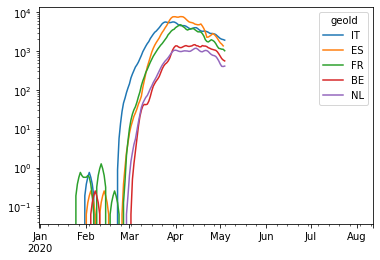

In [9]:
(df_geo['cases'][['IT', 'ES', 'FR', 'BE', 'NL']].rolling(7, win_type='triang').mean()).plot(logy=True)

We create a simple dataframe to contain the source values for our fitting algorithm, with a rolling window to smooth out the target because of the reporting cycle where many of the cases over the weekend end up in the reported data for Tuesdays and Wednesdays. To ignore the noise of early cases before the outbreak we select only those days where the number is above 100 and take the logarithm.

Now we can use polynomial regression to estimate the curve with `polyfit`. We are looking for a parabola, so we use a second order approximation. The outputs are factors a, b, and c for the function `ax^2 + bx + c`. Our fit function cannot handle missing values, but they are already filtered out in the selection above.

The `polyval` function takes the results of `polyfit` and applies them to input data. Once we have the resulting values, we take the exponential and we get the estimated curve.

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change, which is rarely the case.

In [10]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

JP factors [-1.40218439e-03  1.32071667e+00 -3.08302322e+02] residuals 0.7539714070170969
RU factors [-8.48182605e-04  8.41530530e-01 -2.04742180e+02] residuals 0.20609961225942247
US factors [-1.62702022e-03  1.53326408e+00 -3.56577590e+02] residuals 1.635216456312324
BR factors [-3.48597728e-04  3.57509685e-01 -8.77074983e+01] residuals 0.7428996275726059
AT factors [-2.30366064e-03  2.08953774e+00 -4.71059925e+02] residuals 0.7243504199526444
CH factors [-1.14198175e-03  1.04325056e+00 -2.35339156e+02] residuals 1.48566509801589
DE factors [-1.39675460e-03  1.29220967e+00 -2.95166302e+02] residuals 2.0440996798585225
IT factors [-8.79963093e-04  8.10318901e-01 -1.82806075e+02] residuals 1.1972806468000277
ES factors [-1.56326087e-03  1.44370559e+00 -3.29445089e+02] residuals 1.3759874232623612
FR factors [-1.32972117e-03  1.22847251e+00 -2.80145233e+02] residuals 2.2075884364622302
SE factors [-4.60733234e-04  4.39472611e-01 -1.02047124e+02] residuals 0.8666762925163654
UK factors [

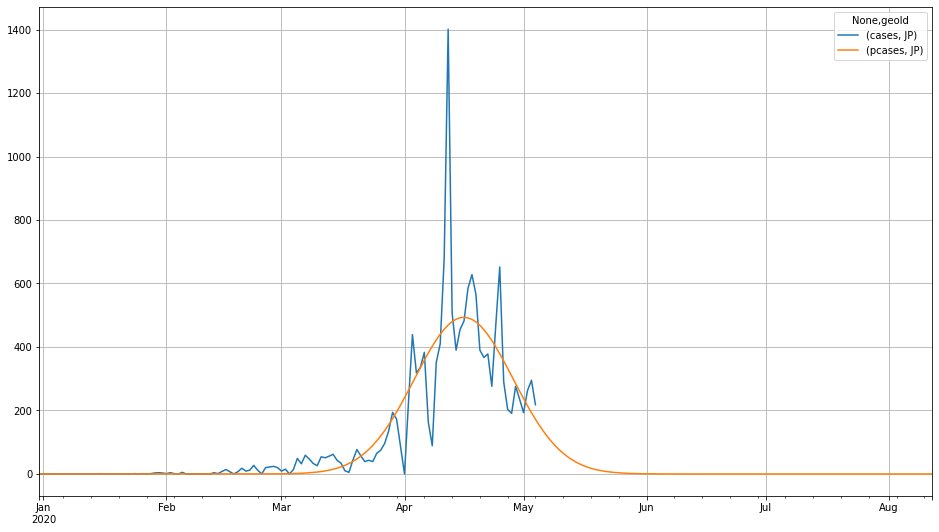

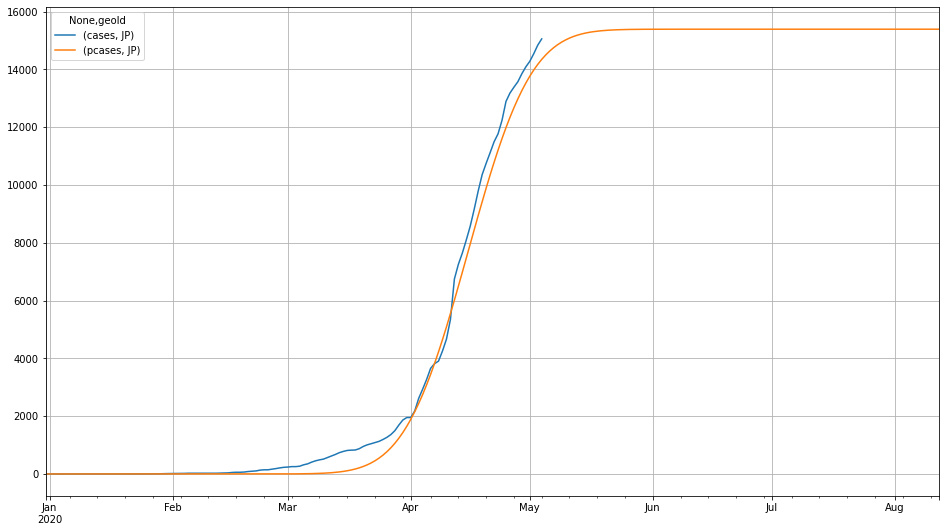

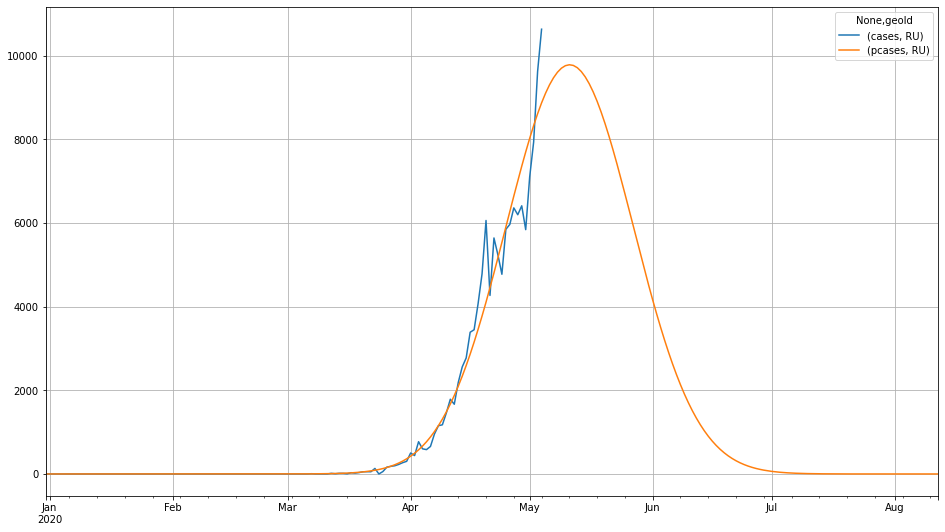

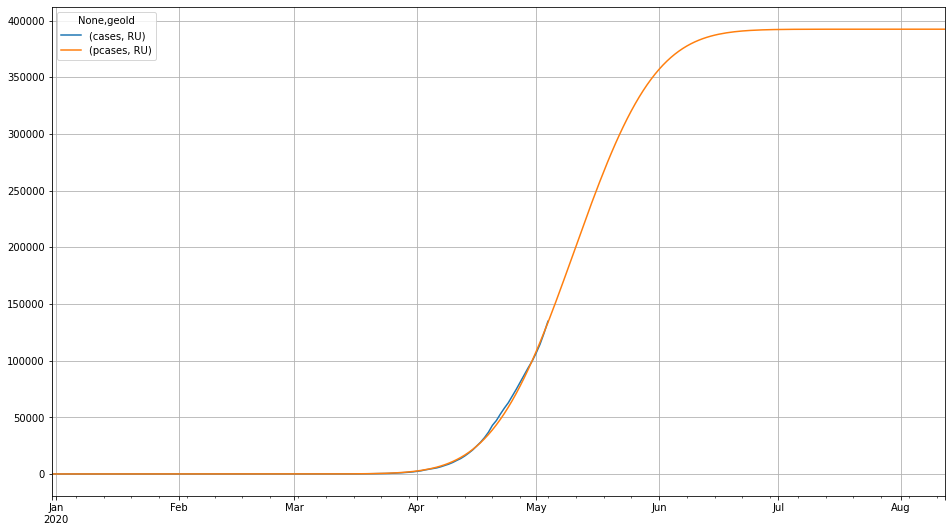

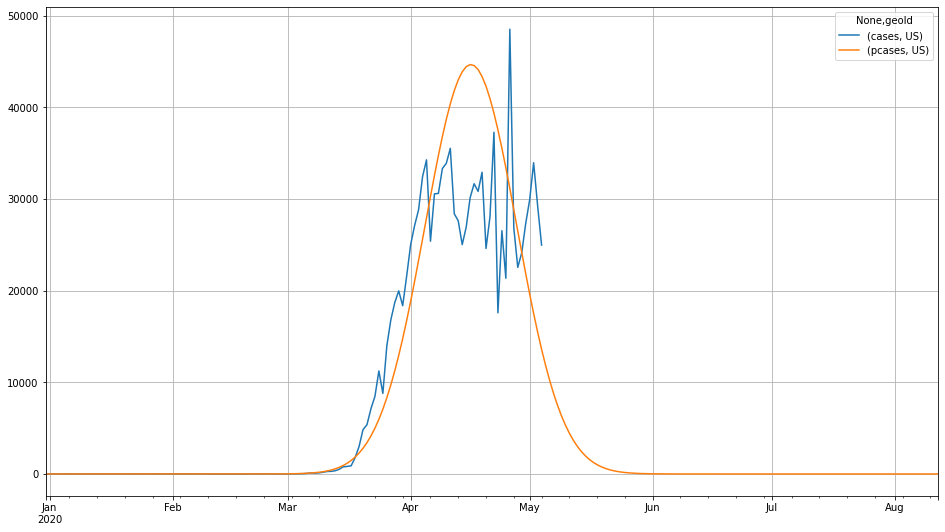

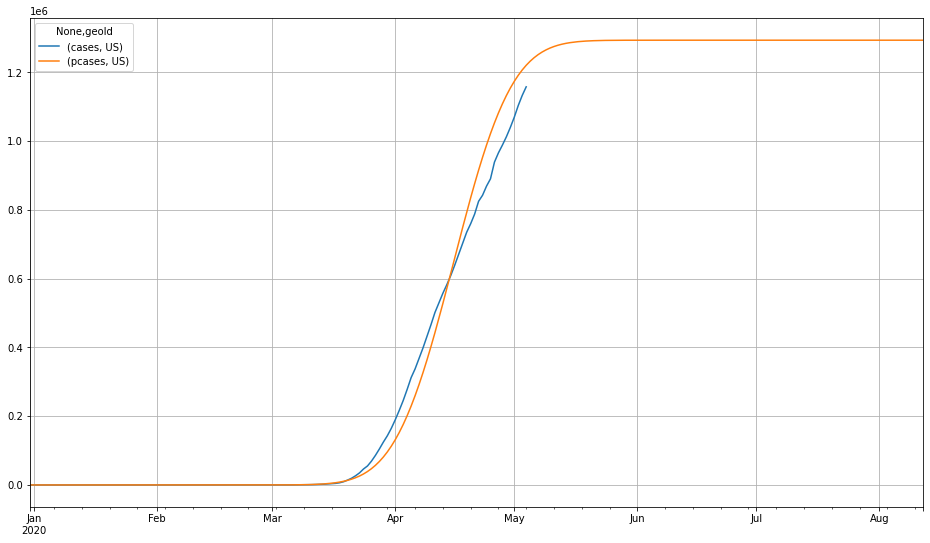

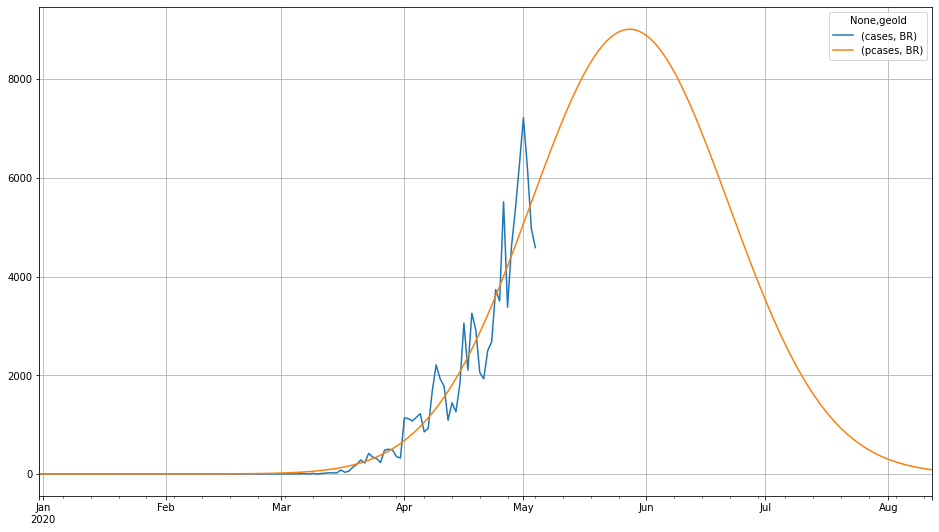

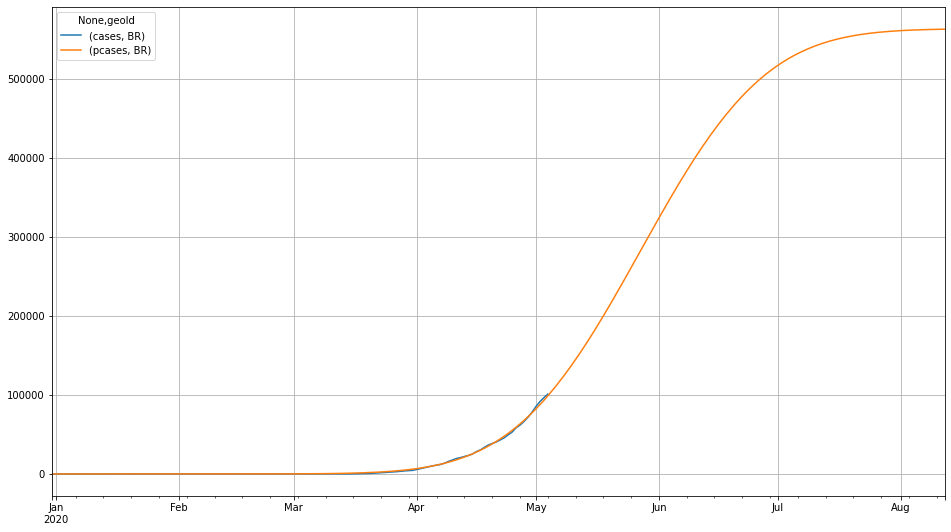

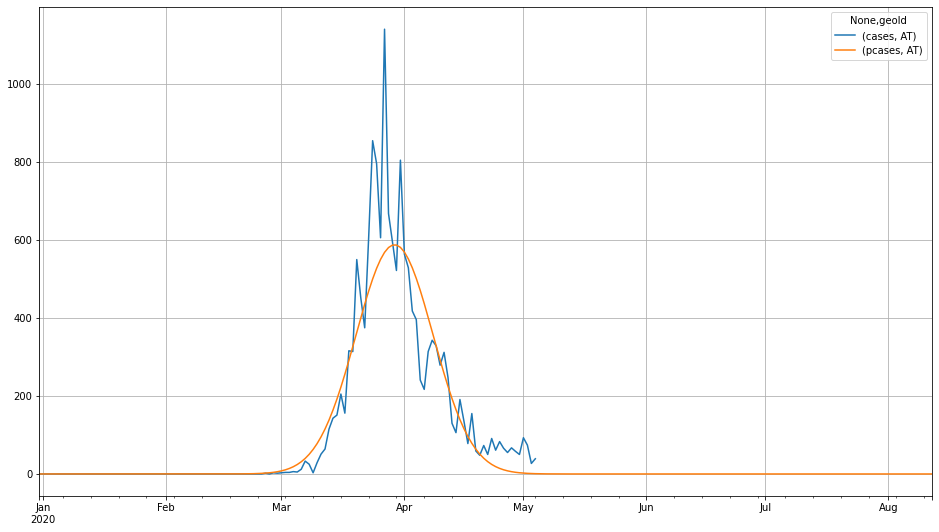

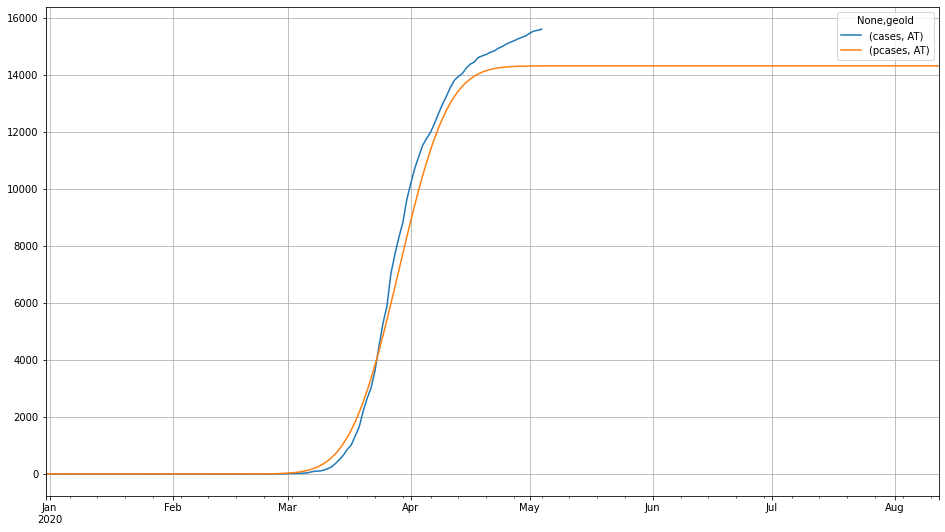

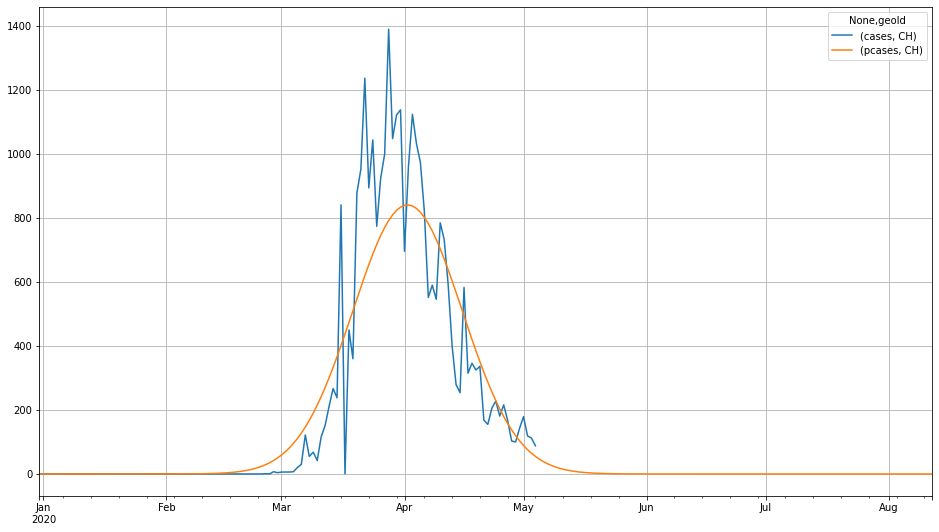

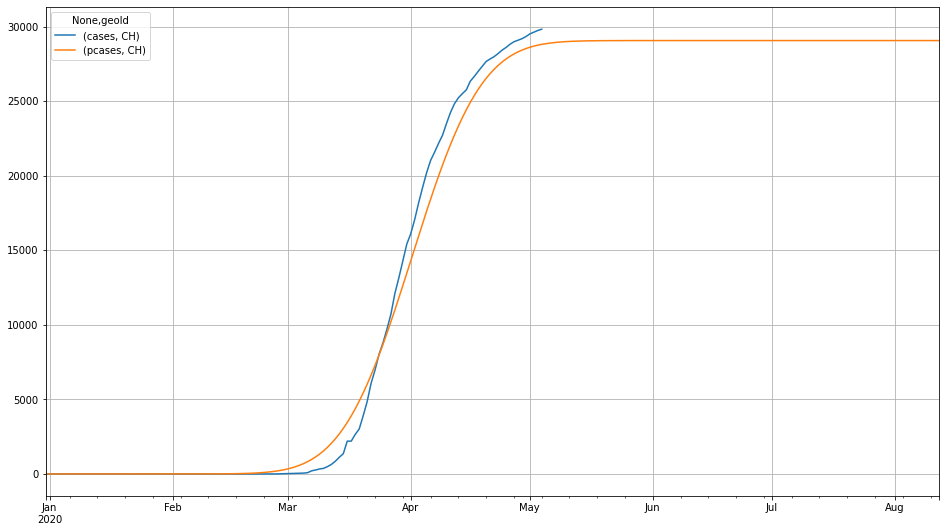

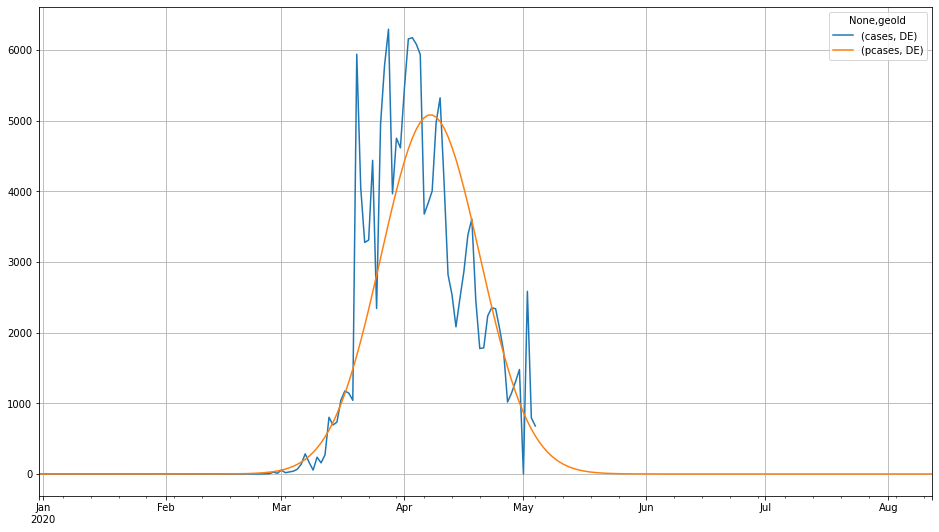

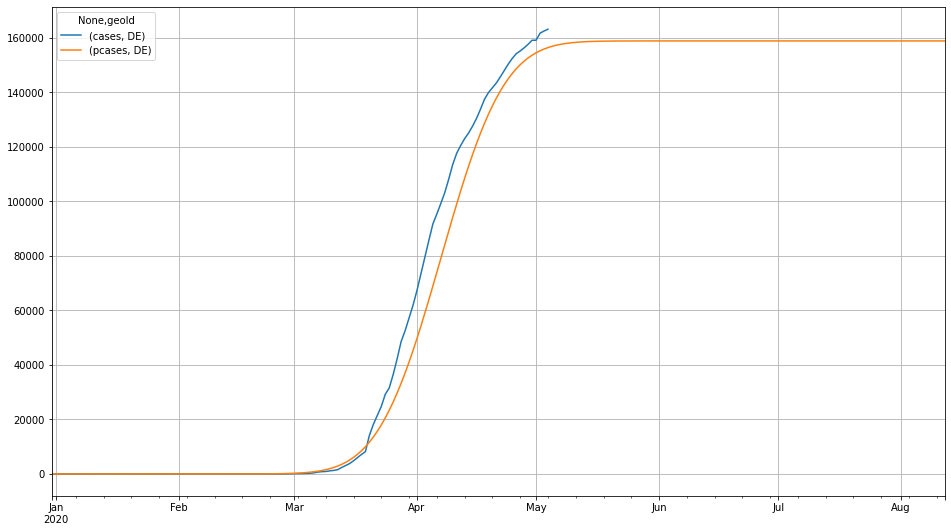

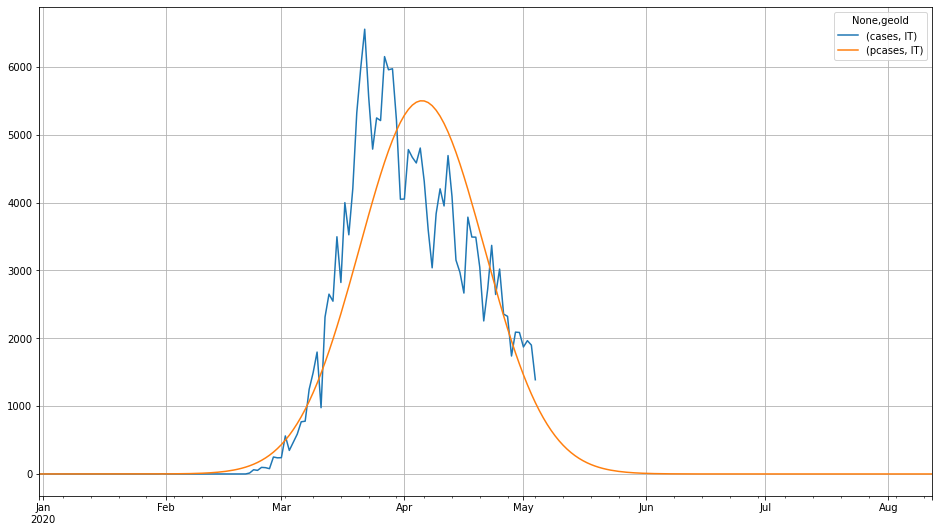

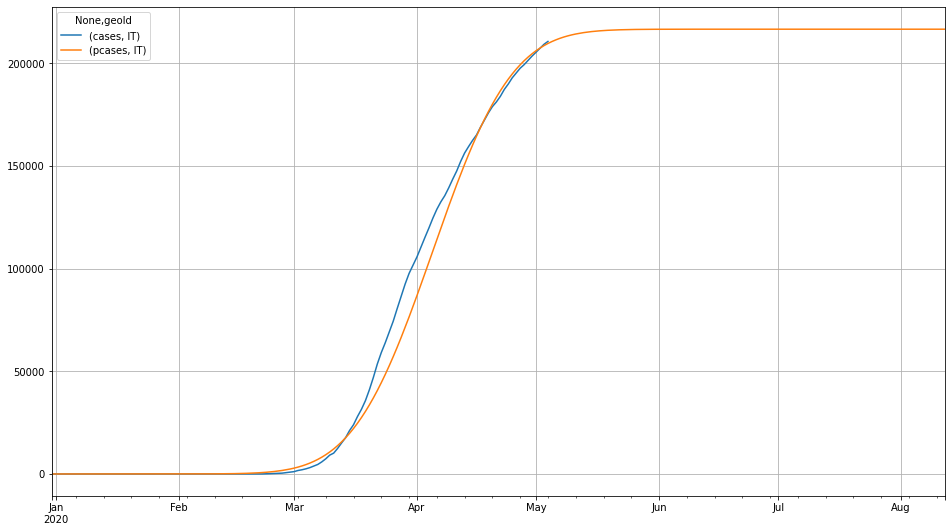

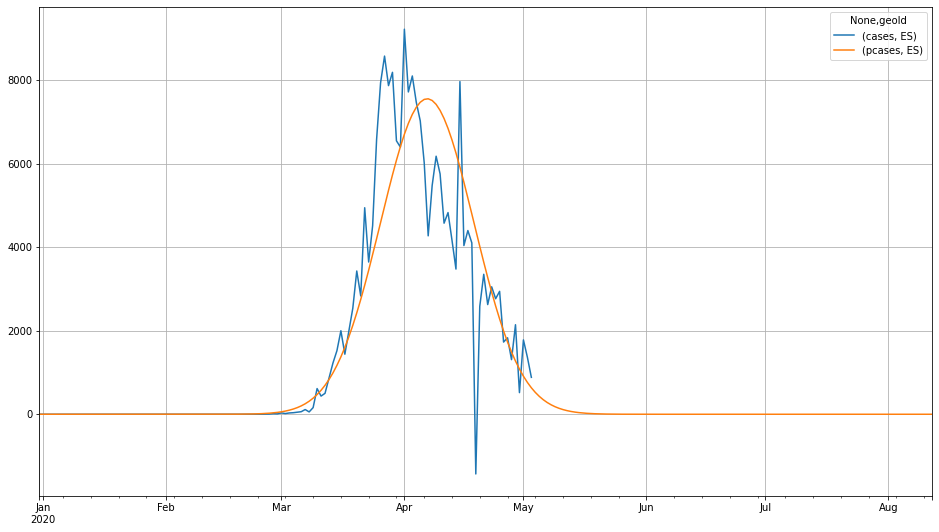

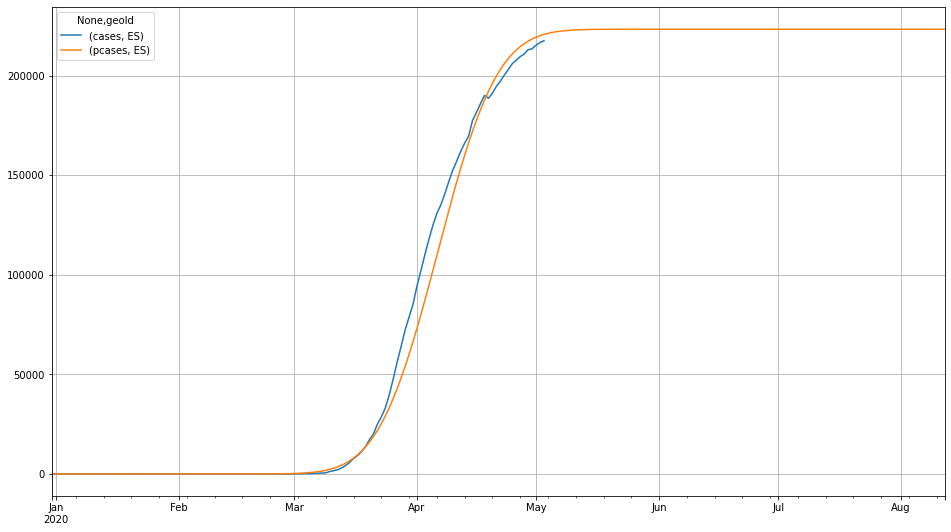

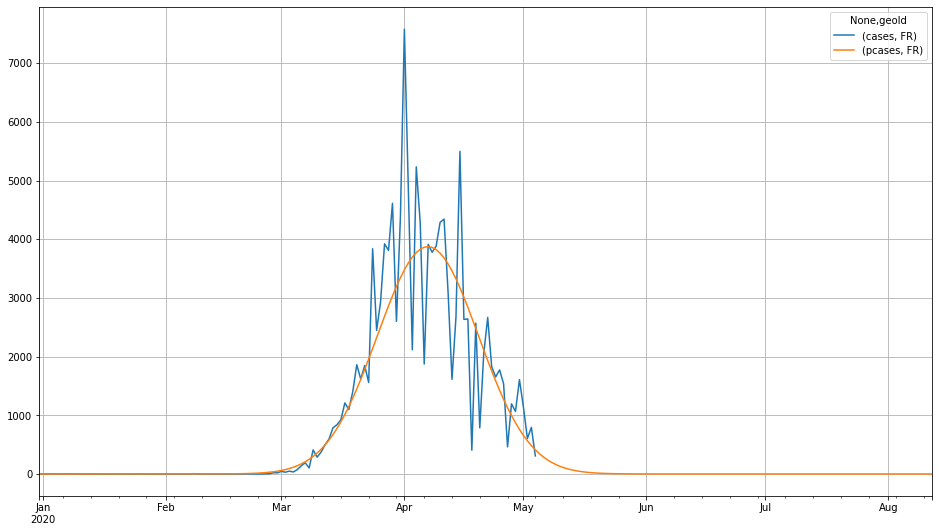

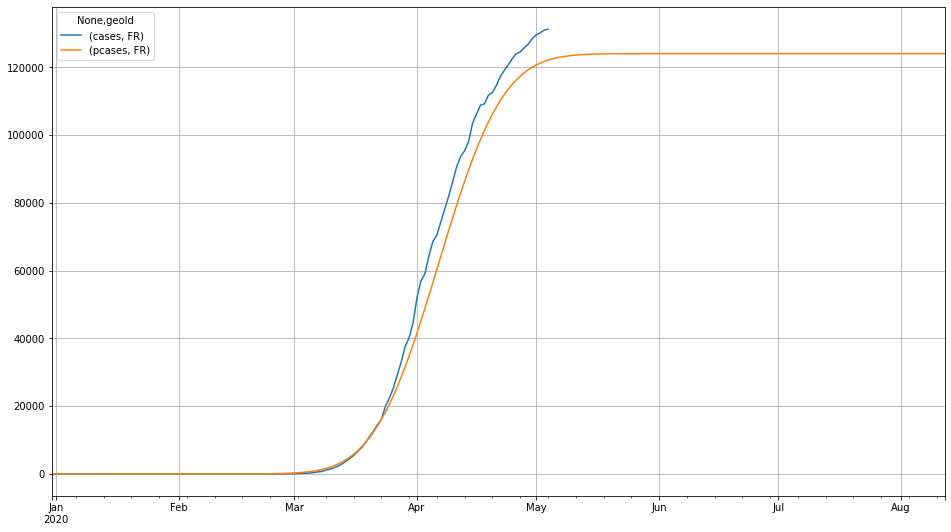

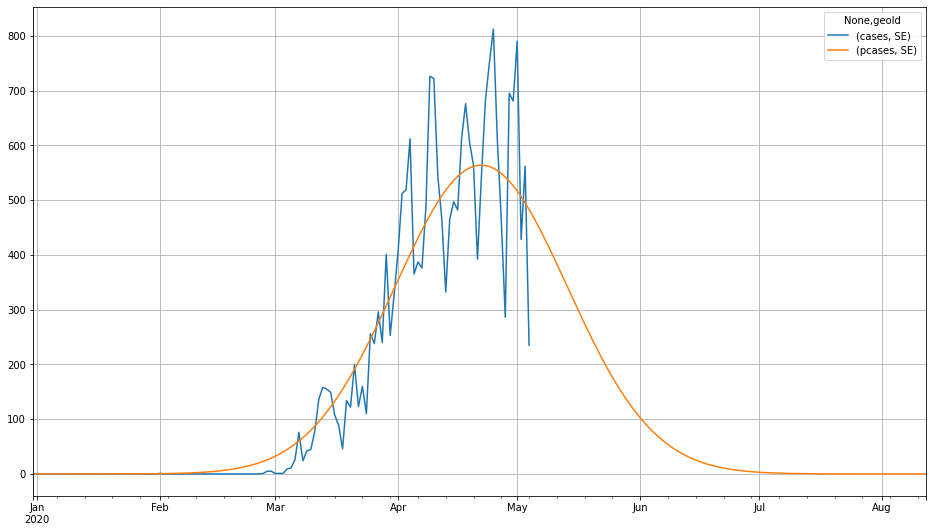

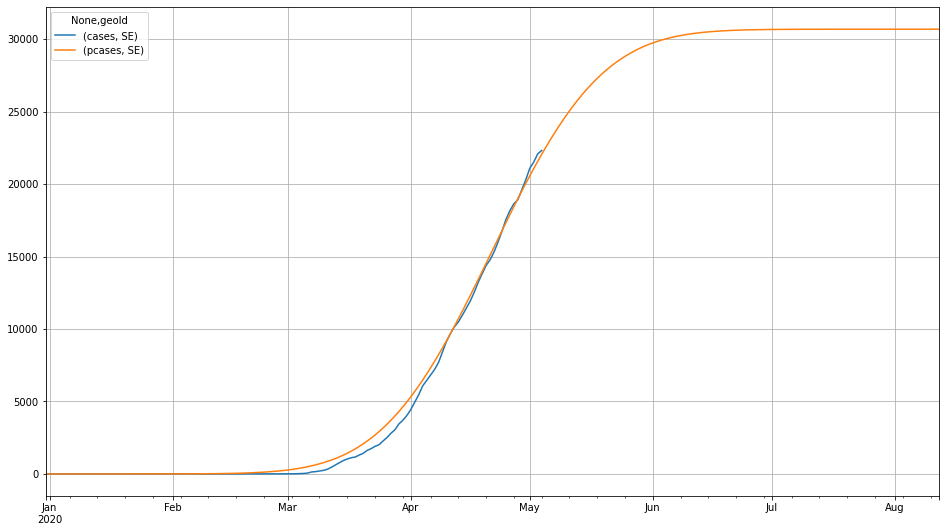

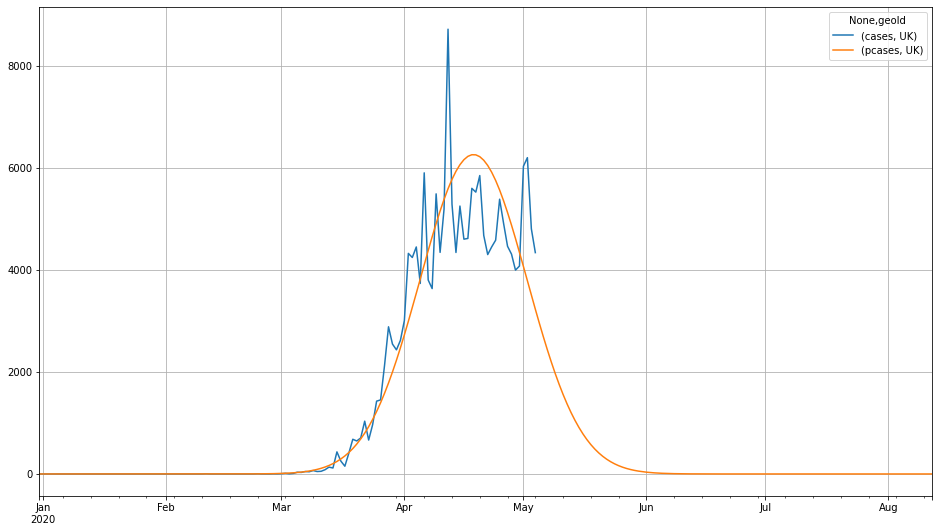

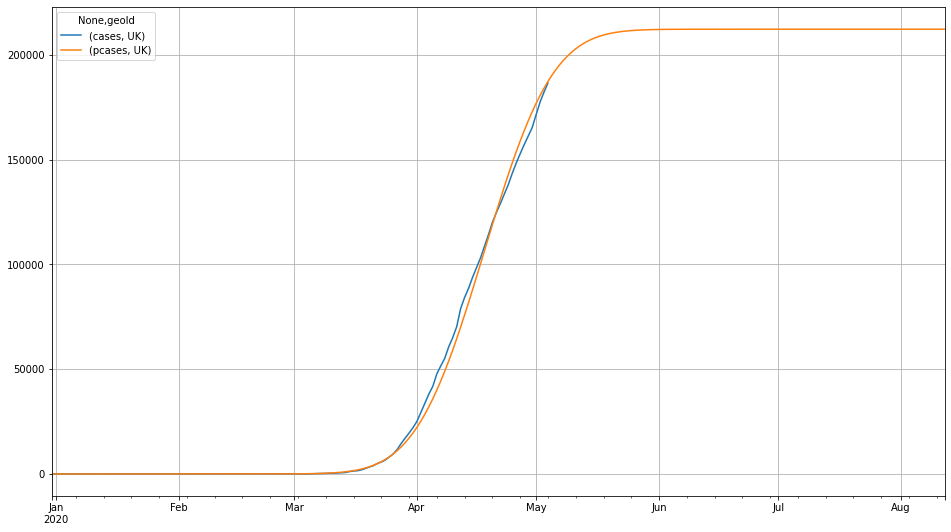

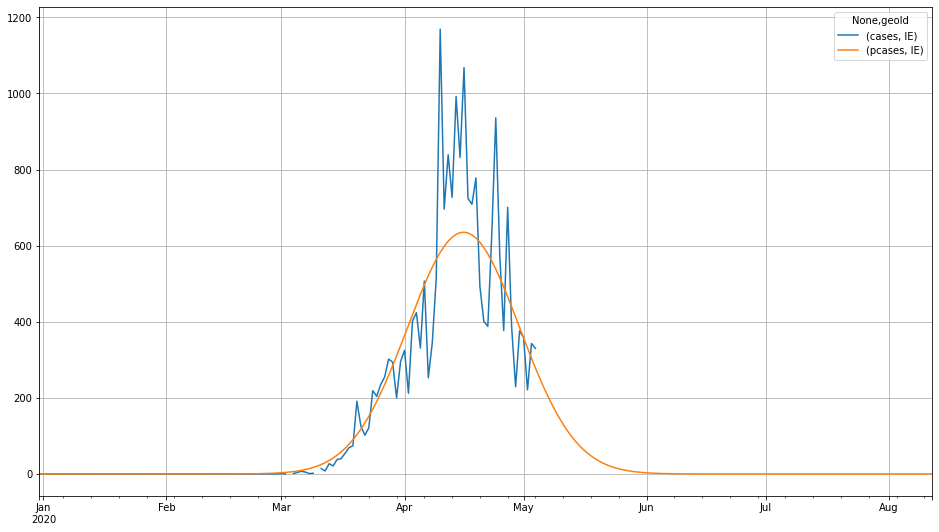

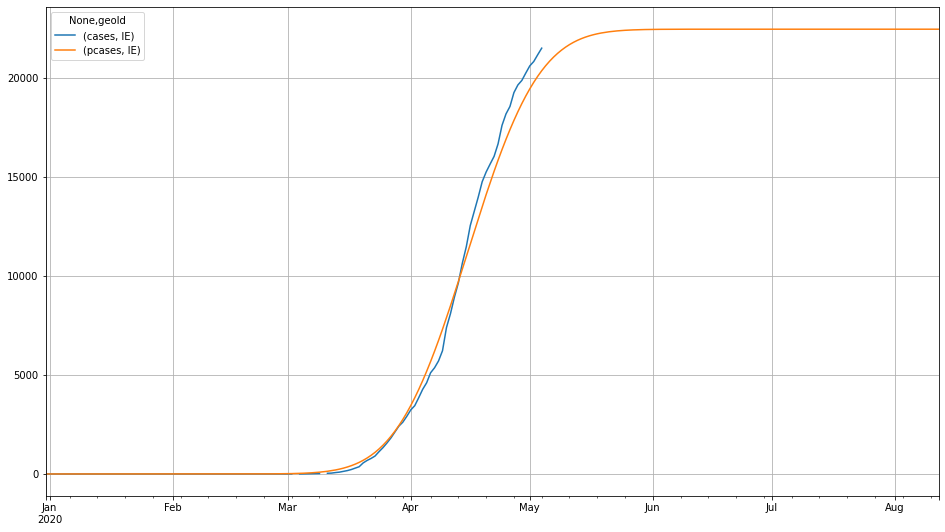

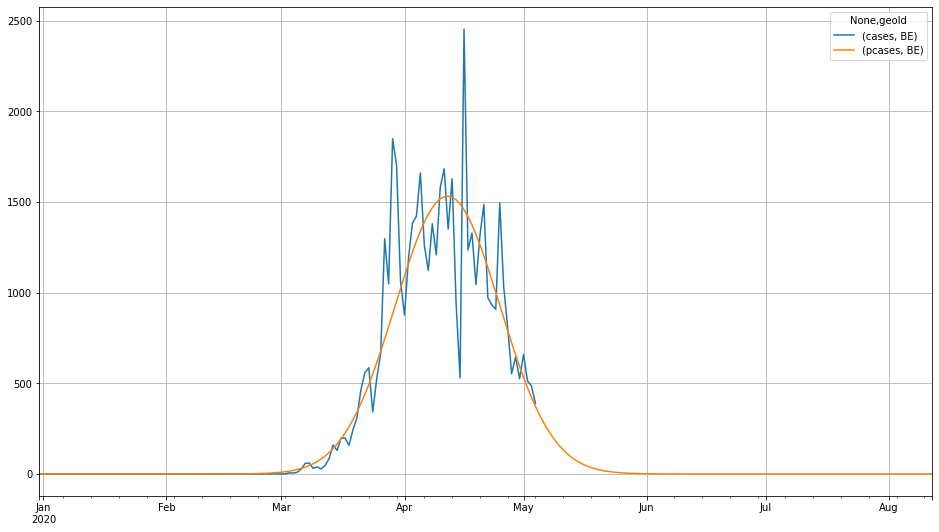

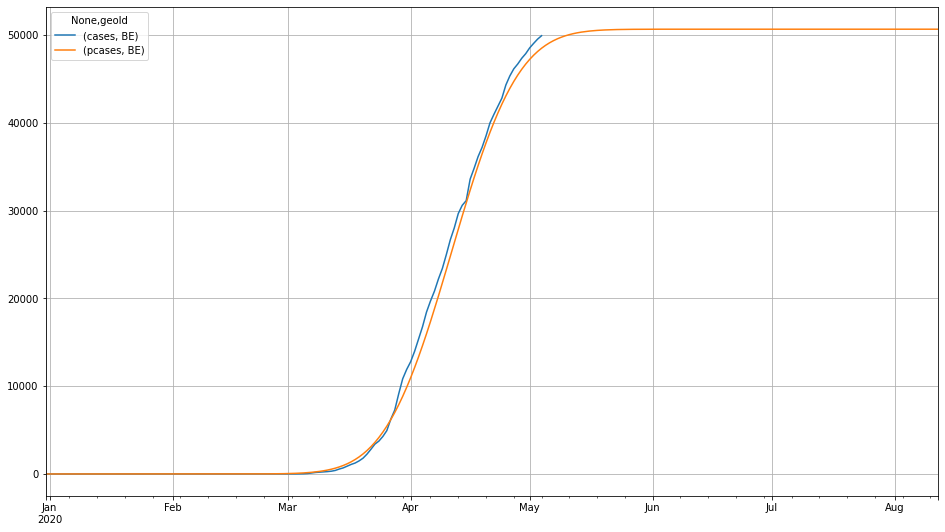

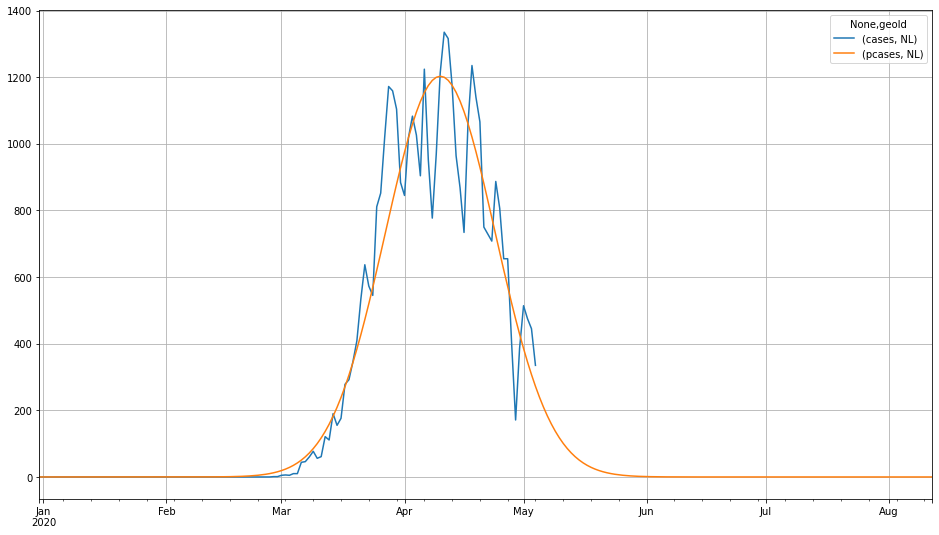

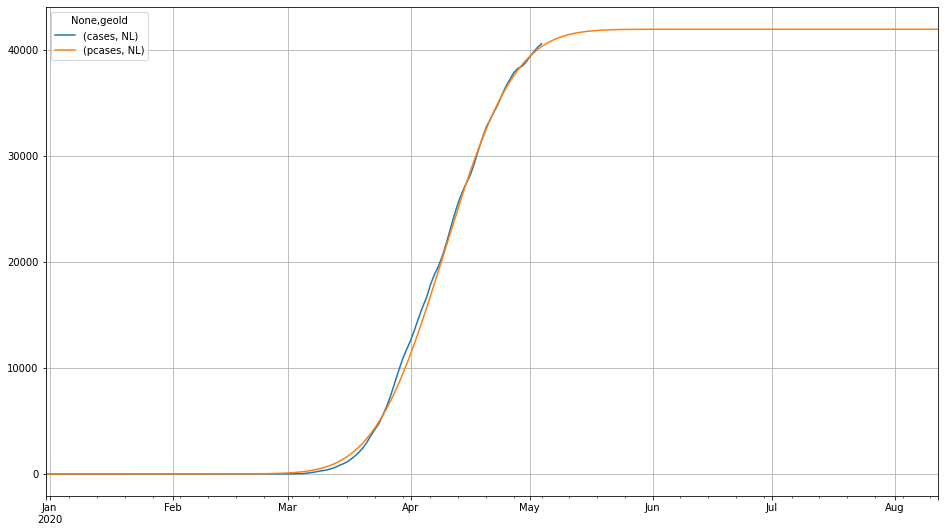

In [11]:
# countries = df['geoId'].unique()

countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'FR', 'SE', 'UK', 'IE', 'BE', 'NL']

measure = 'cases'
pmeasure = 'pcases'

for country in countries:
    df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country]})
    df_pred = df_pred[df_pred['y'] > 100]
    df_pred['y'] = np.log10(df_pred['y'])
    fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=2, full=True)
    df_geo[(pmeasure, country)] = 10 ** np.polyval(fit[0], df_geo['daynum'])
    print(country, "factors", fit[0], "residuals", fit[1][0])
    df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)
    df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.